Outlier Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/Clean_Dataset.csv',index_col=0)

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


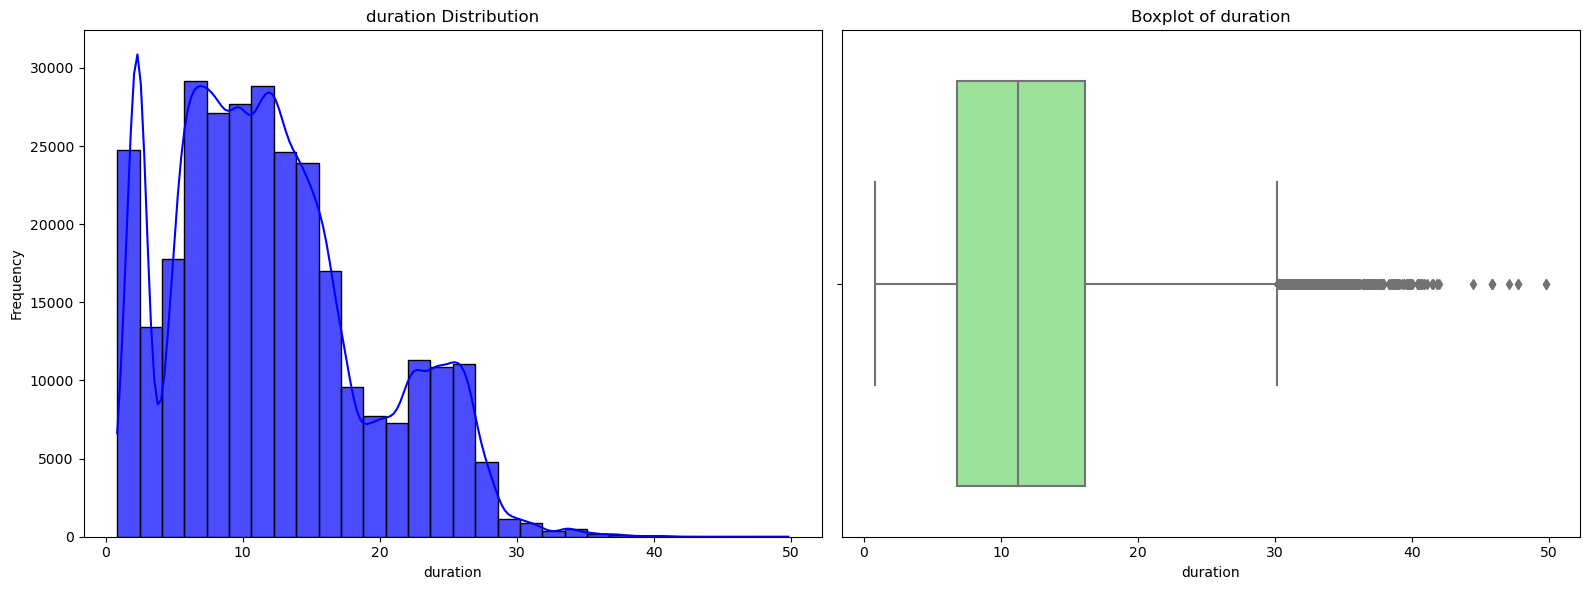

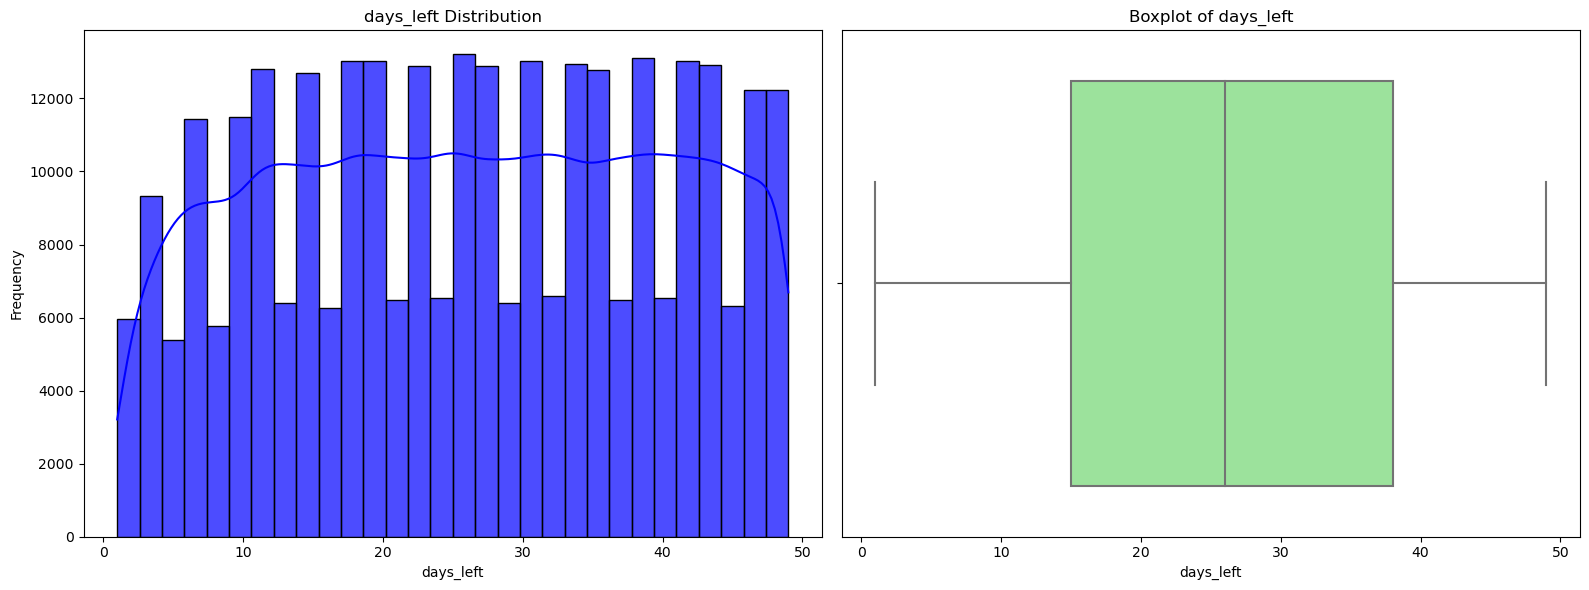

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features excluding 'price'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'price']

# Plot settings
for feature in numeric_features:
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()


In [6]:
# Select numeric features excluding 'price'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'price']
outliers_indices = set()
outliers_per_feature = {}

# Identify and collect indices of outliers for each numeric feature
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find indices of outliers for the current feature
    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_per_feature[feature] = feature_outliers.index.tolist()
    outliers_indices.update(feature_outliers.index)  # Add indices to the set to avoid duplicates

# Print outliers for each feature
for feature, indices in outliers_per_feature.items():
    print(f"Feature: {feature}")
    if indices:
        # print(f"Outliers indices: {indices}")
        print(f"Number of outliers: {len(indices)}")
    else:
        print("No outliers found.")
    print("-" * 40)

# Print total number of unique outliers
print(f"Total unique outlier rows: {len(outliers_indices)}")



Feature: duration
Number of outliers: 2110
----------------------------------------
Feature: days_left
No outliers found.
----------------------------------------
Total unique outlier rows: 2110


In [7]:
# Drop all outlier rows
if outliers_indices:
    df = df.drop(index=outliers_indices)
    print(f"Dropped {len(outliers_indices)} outlier rows.")
else:
    print("No outliers found.")

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

Dropped 2110 outlier rows.


In [8]:
df.shape

(298043, 11)

#### Encoding 

In [9]:
stops_mapping = {'zero': 0 , 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)

In [10]:
df['stops'].value_counts()

1    249573
0     36004
2     12466
Name: stops, dtype: int64

In [11]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  object 
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  object 
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  object 
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  object 
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.0+ MB


In [13]:
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

df['arrival_time'] = df['arrival_time'].map(time_mapping)
df['departure_time'] = df['departure_time'].map(time_mapping)

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,Economy,2.33,1,5955


In [15]:
from sklearn.preprocessing import LabelEncoder

le_class = LabelEncoder()
le_fligh = LabelEncoder()

df['class'] = le_class.fit_transform(df['class'])
df['flight'] = le_fligh.fit_transform(df['flight'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 22.7+ MB


In [17]:
# city_mapping = {
#     'Delhi': 0,
#     'Mumbai': 1,
#     'Bangalore': 2,
#     'Kolkata': 3,
#     'Hyderabad': 4,
#     'Chennai': 5
# }

# df['source_city'] = df['source_city'].map(city_mapping)
# df['destination_city'] = df['destination_city'].map(city_mapping)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  object 
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  object 
 3   departure_time    298043 non-null  int64  
 4   stops             298043 non-null  int64  
 5   arrival_time      298043 non-null  int64  
 6   destination_city  298043 non-null  object 
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(2), int64(5), object(3)
memory usage: 22.7+ MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_pandas_encoded = pd.get_dummies(df, columns=['airline','source_city','destination_city'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")
categorical_columns = ['airline','source_city','destination_city']

encoder = OneHotEncoder(sparse_output=False)  # drop='first' to avoid multicollinearity

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

# print(f"One-Hot Encoded Data using scikit-learn:\n{df_sklearn_encoded}\n")

One-Hot Encoded Data using Pandas:
        flight  departure_time  stops  arrival_time  class  duration  \
0         1408               3      0             4      1      2.17   
1         1387               0      0             1      1      2.33   
2         1213               0      0             0      1      2.17   
3         1559               1      0             2      1      2.25   
4         1549               1      0             1      1      2.33   
...        ...             ...    ...           ...    ...       ...   
298038    1477               1      1             3      0     10.08   
298039    1481               2      1             4      0     10.42   
298040    1486               0      1             4      0     13.83   
298041    1483               0      1             3      0     10.00   
298042    1477               1      1             3      0     10.08   

        days_left  price  airline_Air_India  airline_GO_FIRST  ...  \
0               1   5953      

In [20]:
# df_sklearn_encoded['source_city'].unique()

In [21]:
df_sklearn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   flight                      298043 non-null  int32  
 1   departure_time              298043 non-null  int64  
 2   stops                       298043 non-null  int64  
 3   arrival_time                298043 non-null  int64  
 4   class                       298043 non-null  int32  
 5   duration                    298043 non-null  float64
 6   days_left                   298043 non-null  int64  
 7   price                       298043 non-null  int64  
 8   airline_AirAsia             298043 non-null  float64
 9   airline_Air_India           298043 non-null  float64
 10  airline_GO_FIRST            298043 non-null  float64
 11  airline_Indigo              298043 non-null  float64
 12  airline_SpiceJet            298043 non-null  float64
 13  airline_Vistar

In [22]:
df_sklearn_encoded.to_csv('./datasets/final_dataset.csv', index = False)

In [23]:
# df.head()
df_sklearn_encoded = pd.read_csv('./datasets/final_dataset.csv')

In [24]:
X=df_sklearn_encoded.drop(['price'],axis=1)
y=df_sklearn_encoded['price']

##### Without Feature Selection

In [25]:
import pickle 

In [26]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((208630, 25), (89413, 25), (208630,), (89413,))

In [28]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

r2_scores = {}

def evaluate_metrics(X_train, X_test, y_train_pred, y_test_pred,model_name = None):
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    if model_name is not None:
        r2_scores[model_name] = r2_test

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')

In [30]:
X_train.head()

,flight,departure_time,stops,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
148173,1454,1,1,1,1,22.42,15,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
186026,1178,1,2,4,1,13.25,49,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
137428,271,2,1,4,1,8.42,22,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
277991,1508,0,1,4,0,13.08,45,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89994,784,3,1,4,1,25.25,32,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Random Forest')

Train MSE: 781319.0013222421, Test MSE: 5400716.4041728
Train RMSE: 883.922508663651, Test RMSE: 2323.9441482472853
Train R2: 0.9984874615495838, Test R2: 0.9895550839164942
Train Adjusted R2: 0.9984872802804745, Test Adjusted R2: 0.9895521626538711
Train MAE: 328.78213261652553, Test MAE: 883.7220674382157


In [33]:
# save_model(rf_regressor, './checkpoint/random_forest.pkl')

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Linear Regression')

Train MSE: 46647616.57258827, Test MSE: 46735564.20717007
Train RMSE: 6829.906044199164, Test RMSE: 6836.341434361662
Train R2: 0.9096958942929702, Test R2: 0.9096140197470783
Train Adjusted R2: 0.9096850718607892, Test Adjusted R2: 0.9095887403495561
Train MAE: 4529.931584527658, Test MAE: 4533.387992982878


In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
y_pred = dt_regressor.predict(X_test)
y_train_pred = dt_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Decision Tree')

Train MSE: 40210.31435156337, Test MSE: 8656692.30787718
Train RMSE: 200.5250965629075, Test RMSE: 2942.2257404688003
Train R2: 0.9999221577275643, Test R2: 0.9832580683839189
Train Adjusted R2: 0.9999221483986118, Test Adjusted R2: 0.983253385954814
Train MAE: 9.203216220102576, Test MAE: 919.8515465685451


In [38]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)
y_train_pred = bagging_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Bagging Regressor')

Train MSE: 756944.0289736325, Test MSE: 5359516.999099626
Train RMSE: 870.0253036398611, Test RMSE: 2315.0630659011485
Train R2: 0.9985346485280685, Test R2: 0.9896347630361656
Train Adjusted R2: 0.9985344729140496, Test Adjusted R2: 0.9896318640584161
Train MAE: 326.58391799433224, Test MAE: 880.1116569585806


In [39]:
#XGB
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_train_pred = xgb_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'XGBoost')


Train MSE: 12243257.0714403, Test MSE: 12630506.834383842
Train RMSE: 3499.0365918978755, Test RMSE: 3553.9424354347443
Train R2: 0.9762985450916396, Test R2: 0.9755727621847804
Train Adjusted R2: 0.9762957046074077, Test Adjusted R2: 0.9755659303082729
Train MAE: 1970.5494623681268, Test MAE: 2003.4320262517153


In [40]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Ridge')


Train MSE: 46647616.86695764, Test MSE: 46735602.88033529
Train RMSE: 6829.906065749195, Test RMSE: 6836.34426285974
Train R2: 0.9096958937231069, Test R2: 0.9096139449536741
Train Adjusted R2: 0.9096850712908576, Test Adjusted R2: 0.9095886655352334
Train MAE: 4529.923103607768, Test MAE: 4533.3820398121325


In [41]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Lasso')


Train MSE: 46648104.3966787, Test MSE: 46736261.10581201
Train RMSE: 6829.941756463133, Test RMSE: 6836.392404317647
Train R2: 0.9096949499249303, Test R2: 0.9096126719540655
Train Adjusted R2: 0.9096841273795722, Test Adjusted R2: 0.9095873921795887
Train MAE: 4528.636851825835, Test MAE: 4532.052599082147


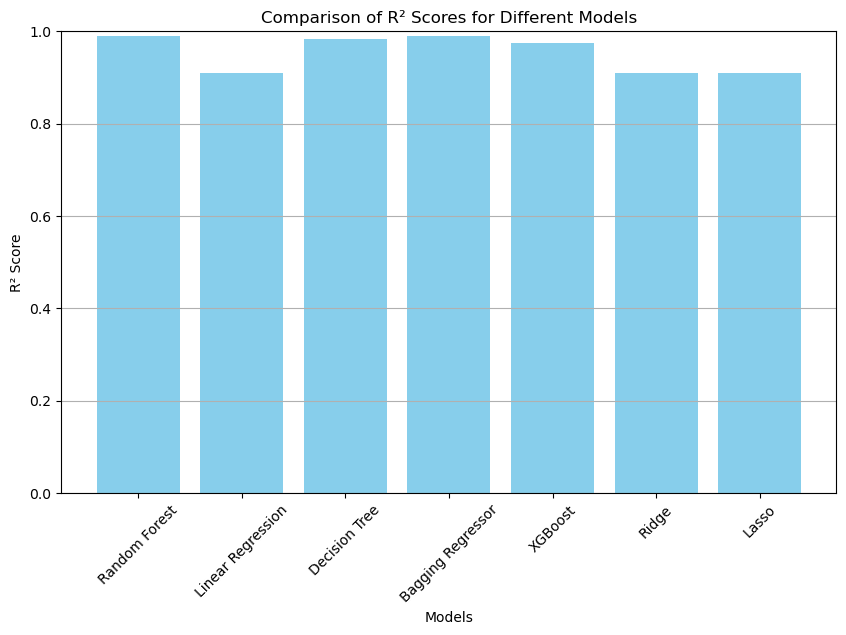

In [ ]:
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='skyblue')  
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y')  

plt.show()


In [43]:
combined_r2 = {}

In [44]:
combined_r2['No Feature Selection'] = r2_scores.copy()

In [45]:
r2_scores = {}

##### Feature Selection

[1.59449578e-02 3.87511974e-03 3.21462323e-02 3.89130737e-03
 8.79936564e-01 1.48118241e-02 1.85126176e-02 3.66034146e-04
 4.43598709e-03 7.39231649e-05 2.69801047e-04 4.49179206e-05
 3.87510754e-03 1.43959529e-03 7.92888117e-04 3.87289795e-03
 1.20082936e-03 1.50806793e-03 1.85682873e-03 1.36085608e-03
 7.61482236e-04 3.45357171e-03 1.69973450e-03 1.97843036e-03
 1.89042379e-03]


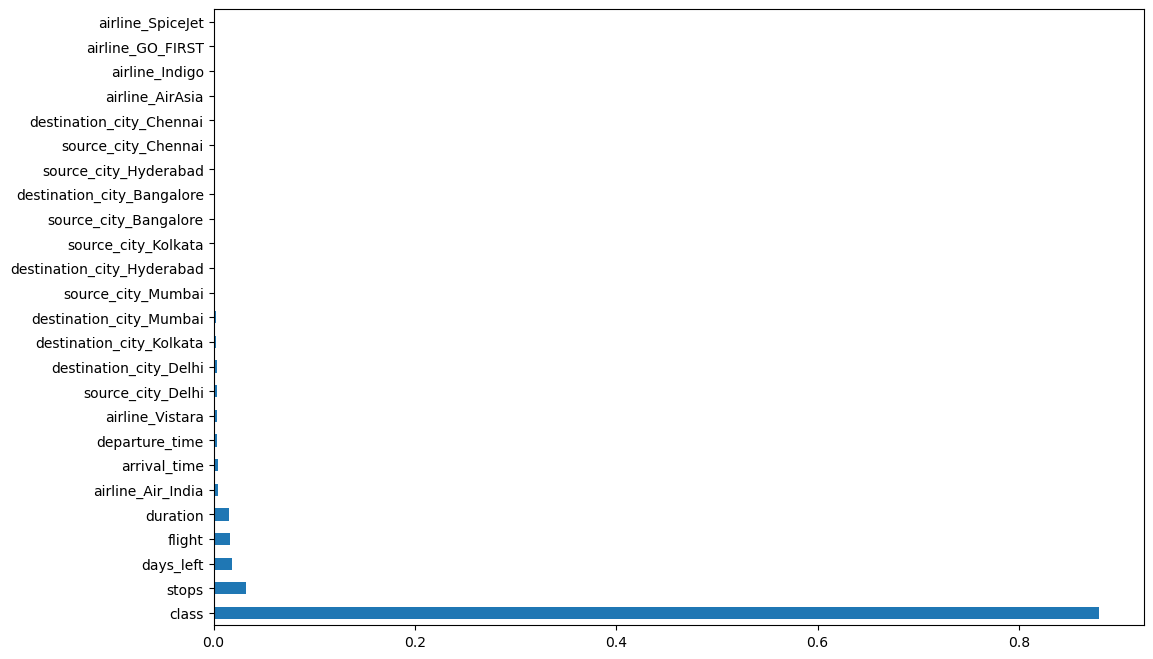

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

Explained variance ratio:
[9.98705522e-01 1.00514951e-03 2.55673360e-04 1.10800917e-05
 9.53787768e-06 1.36578735e-06 1.32072003e-06 1.25613489e-06
 1.07116692e-06 1.05353415e-06 9.28582687e-07 8.39865533e-07
 8.17452359e-07 7.51321663e-07 7.12215128e-07 6.72847767e-07
 6.31015929e-07 5.82910729e-07 4.55900870e-07 3.40036649e-07
 1.97030539e-07 4.11169507e-08 1.01564518e-34 1.40455180e-35
 1.62200616e-36]


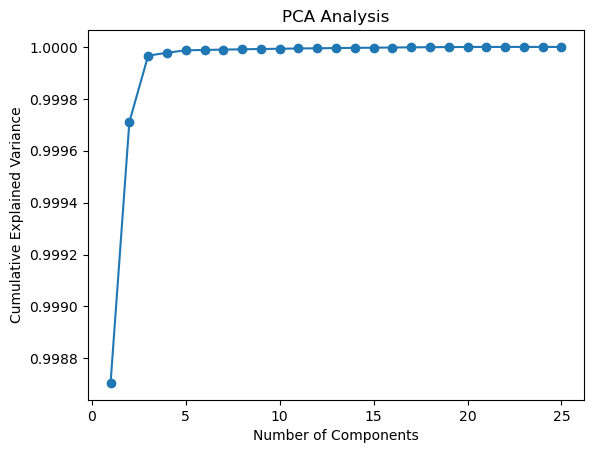

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Analysis")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

n_components = 7
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print(X_pca_df.head())

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")


          PC1        PC2        PC3       PC4       PC5       PC6       PC7
0 -319.437036  24.754058 -11.624337  0.884946  1.500035  1.022331  0.061456
1 -298.437460  24.759839 -11.399243 -0.449654 -2.522951  0.953755  0.026451
2 -124.438115  24.776882 -10.924176  0.005198 -3.394095  0.935958 -0.020018
3 -470.436996  24.736883 -12.081829 -0.000208 -1.194257  0.993533  0.013708
4 -460.437369  24.740167 -11.938422  0.444923 -2.084391  0.972440  0.005342
Explained Variance by each component: [9.98705522e-01 1.00514951e-03 2.55673360e-04 1.10800917e-05
 9.53787768e-06 1.36564944e-06 1.32035871e-06]
Total explained variance: 0.9999896483680256


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((208630, 7), (89413, 7), (208630,), (89413,))

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Random Forest')

Train MSE: 1008377.5351674899, Test MSE: 6867957.5459678685
Train RMSE: 1004.1800312531064, Test RMSE: 2620.678833044574
Train R2: 0.9980479038755032, Test R2: 0.9867174584139818
Train Adjusted R2: 0.9980478383758298, Test Adjusted R2: 0.9867164184521106
Train MAE: 384.5134067975393, Test MAE: 1026.7548649313096


In [53]:
save_model(rf_regressor, './checkpoint/random_forest.pkl')

In [54]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Linear Regression')

Train MSE: 231698614.28241092, Test MSE: 231935823.37254974
Train RMSE: 15221.649525672667, Test RMSE: 15229.439365011101
Train R2: 0.5514596951856605, Test R2: 0.5514390998176889
Train Adjusted R2: 0.5514446450848385, Test Adjusted R2: 0.5514039795637738
Train MAE: 12565.176142513592, Test MAE: 12557.948290752585


In [56]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [57]:
y_pred = dt_regressor.predict(X_test)
y_train_pred = dt_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Decision Tree')

Train MSE: 40210.31435156337, Test MSE: 11356508.598707994
Train RMSE: 200.5250965629075, Test RMSE: 3369.9419280913426
Train R2: 0.9999221577275643, Test R2: 0.9780366583915665
Train Adjusted R2: 0.9999221551156829, Test Adjusted R2: 0.9780349387630082
Train MAE: 9.203216220102576, Test MAE: 1115.2863640261112


In [58]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)
y_train_pred = bagging_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Bagging Regressor')

Train MSE: 981860.6507705232, Test MSE: 6826426.636214285
Train RMSE: 990.8888185717524, Test RMSE: 2612.743124804711
Train R2: 0.9980992373349069, Test R2: 0.9867977786594427
Train Adjusted R2: 0.9980991735576511, Test Adjusted R2: 0.986796744986277
Train MAE: 381.4439077417573, Test MAE: 1022.0456781789846


In [59]:
#XGB
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_train_pred = xgb_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'XGBoost')


Train MSE: 14055854.572131101, Test MSE: 14689042.17411868
Train RMSE: 3749.1138382464596, Test RMSE: 3832.628624602008
Train R2: 0.9727895770385351, Test R2: 0.9715915813062863
Train Adjusted R2: 0.9727886640333835, Test Adjusted R2: 0.9715893570578567
Train MAE: 2196.5709912119323, Test MAE: 2230.3323842494983


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Ridge')


Train MSE: 231698614.36930874, Test MSE: 231935813.16959554
Train RMSE: 15221.649528527081, Test RMSE: 15229.439030036383
Train R2: 0.5514596950174369, Test R2: 0.5514391195500711
Train Adjusted R2: 0.551444644916609, Test Adjusted R2: 0.5514039992977009
Train MAE: 12565.20852496804, Test MAE: 12557.98013035879


In [61]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Lasso')


Train MSE: 231698623.53170246, Test MSE: 231935800.43812737
Train RMSE: 15221.64982949294, Test RMSE: 15229.438612047634
Train R2: 0.5514596772801583, Test R2: 0.5514391441725669
Train Adjusted R2: 0.5514446271787354, Test Adjusted R2: 0.5514040239221246
Train MAE: 12565.3872951433, Test MAE: 12558.164551435217


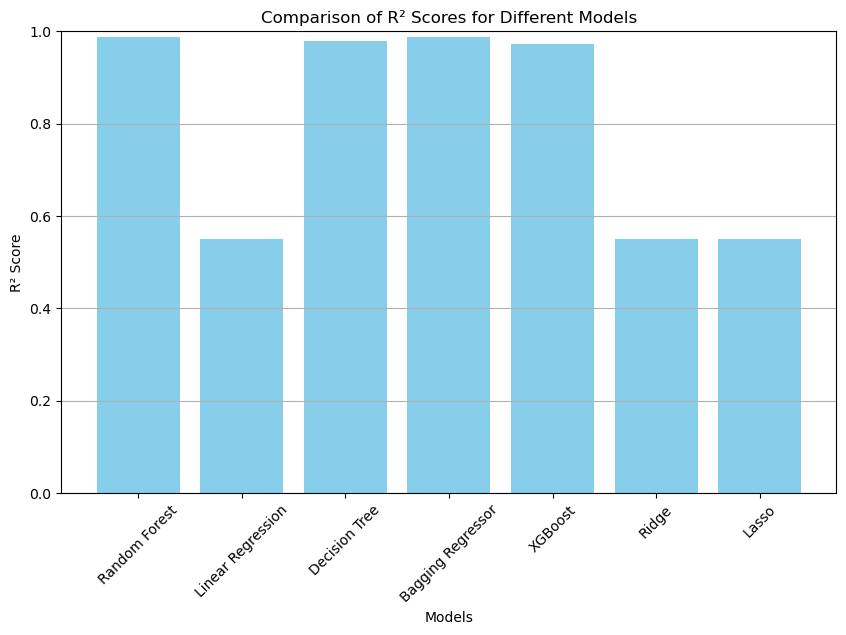

In [ ]:
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='skyblue')  
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y')  

plt.show()


In [63]:
combined_r2['Feature Selection'] = r2_scores.copy()

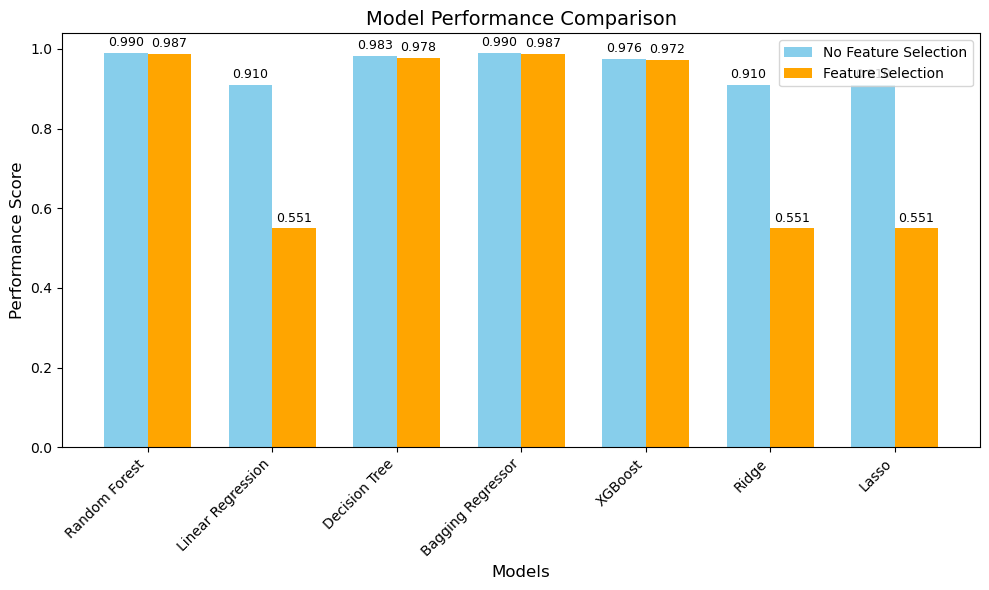

In [ ]:
models = list(combined_r2['No Feature Selection'].keys())
no_fs_values = list(combined_r2['No Feature Selection'].values())
fs_values = list(combined_r2['Feature Selection'].values())

x = np.arange(len(models))
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, no_fs_values, width, label='No Feature Selection', color='skyblue')
bars2 = ax.bar(x + width/2, fs_values, width, label='Feature Selection', color='orange')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Performance Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20], 
    'min_samples_split': [5, 10], 
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,                            
                           verbose=2,                    
                           n_jobs=-1)                        

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

def evaluate_metrics(X_train, X_test, y_train_pred, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Train R^2: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test R^2: {r2_score(y_test, y_pred):.4f}")

evaluate_metrics(X_train, X_test, y_train_pred, y_pred, 'Tuned Random Forest')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score (MSE):  9853709.053535026
Evaluation for Tuned Random Forest:
Train MSE: 6630532.5008
Test MSE: 9558038.1166
Train R^2: 0.9872
Test R^2: 0.9815
